# Importing the Test dataset

In [1]:
import json
import pandas as pd

data_path = "c_test0.jsonl"
tests_path = "tests_all.jsonl"

df = pd.read_json(data_path, lines=True)
tests_df = pd.read_json(tests_path, lines=True)


In [2]:
df.head()

,id,buggy_submission_id,fixed_submission_id,problem_id,user_id,buggy_code,fixed_code,labels,change_count,line_hunks,errors
0,209,310,311,p00000,u940395729,"#include <stdio.h>\nint main() {\n int i, j;\...","#include <stdio.h>\nint main() {\n int i, j;\...","[literal.string.change, call.arguments.change,...",1,1,NaN
1,220,330,331,p00000,u673315234,#include <stdio.h>\n\ntypedef int S4;\n\n#defi...,#include <stdio.h>\n\ntypedef int S4;\n\n#defi...,"[expression.operator.compare.change, control_f...",2,1,NaN
2,284,423,424,p00000,u611853667,"main(n, m) {\n for (; n - 9; (m %= 9) || n++)...","main(n, m) {\n for (m = 0; n <= 9; (m %= 9) |...","[control_flow.loop.for.initializer.change, con...",4,1,NaN
3,286,426,427,p00000,u611853667,"#include <stdio.h>\n\nint main() {\n int a, b...","#include <stdio.h>\n\nint main() {\n int a, b...","[expression.operator.compare.change, control_f...",1,1,NaN
4,374,540,541,p00000,u904505033,"#include <stdio.h>\nmain() {\n int i, j, ans;...","#include <stdio.h>\nmain() {\n int i, j, ans;...","[literal.number.change, control_flow.loop.for....",5,2,NaN


In [3]:
tests_df.head()

,id,problem_id,input,output
0,613037,p01674,0.0 0.0 2.2499950643031132\n1.9318429304673748...,NO\n
1,89648,p02055,2 0\n1 2 7,Yes\n
2,98357,p03559,6\n9 14 159 0 6 53\n106 9 7 323 28 7\n2643 391...,83\n
3,736451,p01566,8 -1\n-1 2 0 0 0 1 0 1 1 -1 0 1,0\n
4,114360,p00908,3 3\noo.\nnXX\n.XX\n3 3\nXXo\nXX.\no.o\n3 5\n....,11\n0\n-1\n382\n3303\n


In [4]:
len(df)

3063

# Setting up the LLM

Get your own API Key from: https://aistudio.google.com/app/apikey

Step 1: Export your API Key as an environment variable

- Windows: setx GEMINI_API_KEY "yourkey"

- Mac/Linux: export GEMINI_API_KEY="yourkey"

Step 2: Restart VSCode or whatever code environment you're using

Step 3: Copy the name of your model and paste it into the cell below:

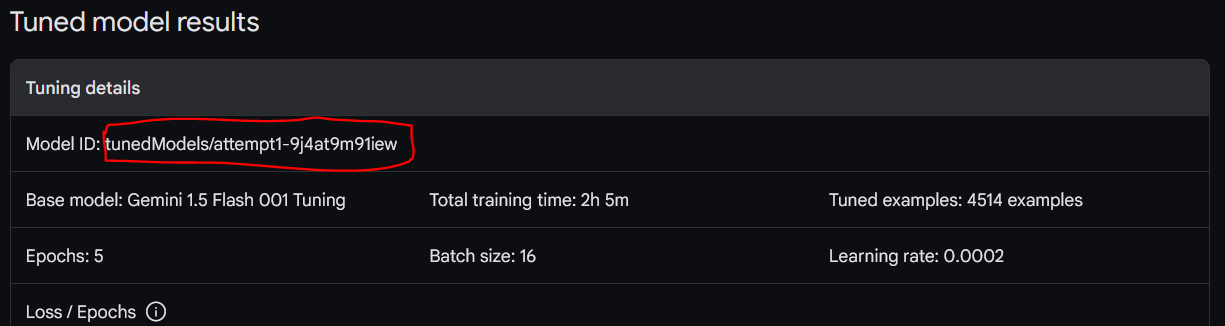

In [5]:
import os
import google.generativeai as genai

genai.configure(api_key=os.environ['GEMINI_API_KEY'])

In [6]:
## TEST WITH BASE GEMINI MODEL
# model = genai.GenerativeModel('gemini-1.5-flash')

## TEST WITH YOUR TRAINED MODEL
model = genai.GenerativeModel(model_name='tunedModels/attempt1-9j4at9m91iew')

# Testing a single code file

For when you want to check why a single instance is failing

- You can use "bundle exec rbugr failing './eval.json.gz'" to check which instances are failing.
- The "21856" below refers to the bug_id:

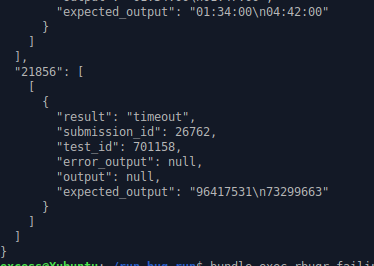

In [20]:
bug_id = 21856
buggy_code = df[df['id'] == bug_id]['buggy_code'].iloc[0]
fixed_code = df[df['id'] == bug_id]['fixed_code'].iloc[0]
problem_id = df[df['id'] == bug_id]['problem_id'].iloc[0]

input = tests_df[tests_df['problem_id'] == problem_id]['input'].iloc[0]
output = tests_df[tests_df['problem_id'] == problem_id]['output'].iloc[0]

In [21]:
prompt = f"""Fix the given buggy code given the code's input and expected output:
    
Buggy Code:
{buggy_code}

Code Input:
{input}

Code Expected Output:
{output}
"""

In [22]:
print(prompt)

Fix the given buggy code given the code's input and expected output:
    
Buggy Code:
#include <stdio.h>

int main() {
  int n, h, i, j, tmp, max, min;
  int num[8];

  scanf("%d", &n);
  for (h = 0; h < n; h++) {
    for (i = 0; i < 8; i++) {
      num[i] = 0;
      scanf("%1d", &num[i]);
    }

    for (i = 0; i < 7; i++) {
      for (j = 7; j > i; j--) {
        if (num[j] > num[j - 1]) {
          tmp = num[j - 1];
          num[j - 1] = num[j];
          num[j] = tmp;
        }
      }
    }

    max = min = 0;
    for (i = 1, j = 7; j >= 0; i *= 10, j--) {
      tmp = num[j] * i;
      max += tmp;
    }
    for (i = 1, j = 0; j < 8; i *= 10, j++) {
      min += num[j] * i;
    }
    printf("A.%d\n", max - min);
  }
  return 0;
}

Code Input:
2
65539010
43966324

Code Expected Output:
96417531
73299663




In [23]:
response = model.generate_content(prompt)
print(response.text)

#include <stdio.h>

int main() {
  int n, h, i, j, tmp, max, min;
  int num[8];

  scanf("%d", &n);
  for (h = 0; h < n; h++) {
    for (i = 0; i < 8; i++) {
      num[i] = 0;
      scanf("%1d", &num[i]);
    }

    for (i = 0; i < 7; i++) {
      for (j = 7; j > i; j--) {
        if (num[j] > num[j - 1]) {
          tmp = num[j - 1];
          num[j - 1] = num[j];
          num[j] = tmp;
        }
      }
    }

    max = min = 0;
    for (i = 1, j = 0; j < 8; i *= 10, j++) {
      max += num[j] * i;
    }
    for (i = 1, j = 7; j >= 0; i *= 10, j--) {
      min += num[j] * i;
    }
    printf("%d\n", max - min);
  }
  return 0;
}


In [24]:
print(fixed_code)

#include <stdio.h>

int main() {
  int n, h, i, j, tmp, max, min;
  int num[8];

  scanf("%d", &n);
  for (h = 0; h < n; h++) {
    for (i = 0; i < 8; i++) {
      num[i] = 0;
      scanf("%1d", &num[i]);
    }

    for (i = 0; i < 7; i++) {
      for (j = 7; j > i; j--) {
        if (num[j] > num[j - 1]) {
          tmp = num[j - 1];
          num[j - 1] = num[j];
          num[j] = tmp;
        }
      }
    }

    max = min = 0;
    for (i = 1, j = 7; j >= 0; i *= 10, j--) {
      tmp = num[j] * i;
      max += tmp;
    }
    for (i = 1, j = 0; j < 8; i *= 10, j++) {
      min += num[j] * i;
    }
    printf("%d\n", max - min);
  }
  return 0;
}


# Creating the output.jsonl file for Test set validation

The command "bundle exec rbugr eval './output.jsonl' --output-filename='./eval.json.gz'" can be used to evaluate the test set.

In [12]:
import time

# Merge the two DataFrames on 'problem_id' for faster access to 'input' and 'output'
merged_df = df.merge(tests_df[['problem_id', 'input', 'output']], on='problem_id', how='left')

responses = []
for i in range(len(df)):
    bug_id = int(df['id'][i])
    buggy_code = merged_df['buggy_code'][i]
    input = merged_df['input'][i]
    output = merged_df['output'][i]

    prompt = f"""Fix the given buggy code given the code's input and expected output:

Buggy Code:
{buggy_code}

Code Input:
{input}

Code Expected Output:
{output}
"""
    
    # Retrying if Rate limit is hit.
    retries = 0
    while retries < 5:  # Max 5 retries
        try:
            response = model.generate_content(prompt)
            break
        except Exception as e:
            wait_time = 2 ** retries  # Exponential backoff
            print(f"Rate limit hit. Retrying in {wait_time} seconds...")
            time.sleep(wait_time)
            retries += 1

    # Skipping if the model generates no response.
    try:
        response_dict = {'id': bug_id, 'preds': [response.text]}
    except Exception as e:
        print(e)
        continue
    responses.append(response_dict)
    print(bug_id)
    

209
220
284
286
374
747
749
818
819
839
843
914
923
941
4163
4200
Rate limit hit. Retrying in 1 seconds...
Rate limit hit. Retrying in 2 seconds...
4201
Rate limit hit. Retrying in 1 seconds...
Rate limit hit. Retrying in 2 seconds...
Rate limit hit. Retrying in 4 seconds...
Rate limit hit. Retrying in 8 seconds...
Rate limit hit. Retrying in 16 seconds...
4202
4203
4204
4286
4374
4391
4399
4404
4405
6448
6450
6502
6507
6531
6537
6569
6570
Rate limit hit. Retrying in 1 seconds...
Rate limit hit. Retrying in 2 seconds...
6573
6752
Rate limit hit. Retrying in 1 seconds...
Rate limit hit. Retrying in 2 seconds...
Rate limit hit. Retrying in 4 seconds...
Rate limit hit. Retrying in 8 seconds...
Rate limit hit. Retrying in 16 seconds...
6806
6816
6898
7080
7358
7359
7361
7372
7546
7548
7549
7600
7601
7622
7635
7636
7639
Rate limit hit. Retrying in 1 seconds...
7640
7641
Rate limit hit. Retrying in 1 seconds...
Rate limit hit. Retrying in 2 seconds...
Rate limit hit. Retrying in 4 seconds...

KeyboardInterrupt: 

In [13]:
responses

[{'id': 209,
  'preds': ['#include <stdio.h>\nint main() {\n  int i, j;\n\n  for (i = 1; i < 10; i++) {\n    for (j = 1; j < 10; j++) {\n      printf("%dx%d=%d\\n", i, j, i * j);\n    }\n  }\n\n  return 0;\n}']},
 {'id': 220,
  'preds': ['#include <stdio.h>\n\ntypedef int S4;\n\n#define START_NUM (1)\n#define END_NUM (10)\n\nS4 main() {\n  S4 s4_t_i;\n  S4 s4_t_j;\n  S4 s4_t_result;\n  for (s4_t_i = (S4)START_NUM; s4_t_i < (S4)END_NUM; s4_t_i++) {\n    for (s4_t_j = (S4)START_NUM; s4_t_j < (S4)END_NUM; s4_t_j++) {\n      s4_t_result = s4_t_i * s4_t_j;\n      printf("%dx%d=%d\\n", s4_t_i, s4_t_j, s4_t_result);\n    }\n  }\n  return 0;\n}']},
 {'id': 284,
  'preds': ['main(n, m) {\n  for (; n - 9; m ? m %= 9 : n++)\n    printf("%dx%d=%d\\n", n, ++m, n * m + n);\n}']},
 {'id': 286,
  'preds': ['#include <stdio.h>\n\nint main() {\n  int a, b;\n  for (a = 1; a <= 9; a++) {\n    for (b = 1; b <= 9; b++) {\n      printf("%dx%d=%d\\n", a, b, a * b);\n    }\n  }\n  return 0;\n}']},
 {'id': 374,

In [14]:
output_file = 'output.jsonl'

with open(output_file, 'w') as f:
    for item in responses:
        # Sometimes it generates some garbage before the actual code so if it does I'm removing it
        if item['preds'][0].startswith("```c"):
            item['preds'][0] = item['preds'][0][5:-3]
        if item['preds'][0].startswith("```python"):
            item['preds'][0] = item['preds'][0][10:]
        print(item)
        f.write(json.dumps(item) + '\n')

{'id': 209, 'preds': ['#include <stdio.h>\nint main() {\n  int i, j;\n\n  for (i = 1; i < 10; i++) {\n    for (j = 1; j < 10; j++) {\n      printf("%dx%d=%d\\n", i, j, i * j);\n    }\n  }\n\n  return 0;\n}']}
{'id': 220, 'preds': ['#include <stdio.h>\n\ntypedef int S4;\n\n#define START_NUM (1)\n#define END_NUM (10)\n\nS4 main() {\n  S4 s4_t_i;\n  S4 s4_t_j;\n  S4 s4_t_result;\n  for (s4_t_i = (S4)START_NUM; s4_t_i < (S4)END_NUM; s4_t_i++) {\n    for (s4_t_j = (S4)START_NUM; s4_t_j < (S4)END_NUM; s4_t_j++) {\n      s4_t_result = s4_t_i * s4_t_j;\n      printf("%dx%d=%d\\n", s4_t_i, s4_t_j, s4_t_result);\n    }\n  }\n  return 0;\n}']}
{'id': 284, 'preds': ['main(n, m) {\n  for (; n - 9; m ? m %= 9 : n++)\n    printf("%dx%d=%d\\n", n, ++m, n * m + n);\n}']}
{'id': 286, 'preds': ['#include <stdio.h>\n\nint main() {\n  int a, b;\n  for (a = 1; a <= 9; a++) {\n    for (b = 1; b <= 9; b++) {\n      printf("%dx%d=%d\\n", a, b, a * b);\n    }\n  }\n  return 0;\n}']}
{'id': 374, 'preds': ['#incl